In [1]:
# pip install matplotlib numpy pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#from basic_units import cm, inch
import math

In [3]:
class Metric:
    def __init__(self,dictionary):
        self.__dict__.update(dictionary)
        self.error = max(np.std(values),self.error)

    def __init__(self, values, error, unit):
        self.values = values
        self.error = max(np.std(values),error)
        self.unit = unit

class Axis:
    major_tick_spacing = None
    minor_tick_spacing = None
    min = None
    max = None

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)

class GridSettings:
    x_axis = Axis({})
    y_axis = Axis({})

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)


class PhysicsObject:

    def __init__(self, ascii_name, axis_description, conjugated_name, mass):
        self.ascii_name = ascii_name
        self.axis_description = axis_description
        self.conjugated_name = conjugated_name
        self.mass = mass
    
    def __init__(self, dictionary):
        self.__dict__.update(dictionary)


class Rod(PhysicsObject):
    length = Metric([0],0,"")
    grid = GridSettings({})

class Disc(PhysicsObject):
    radius = Metric([0],0,"")
    grid = GridSettings({})


In [4]:
pret = Rod({
    "ascii_name" : "pret",
    "conjugated_name" : "pręta",
    "x_axis_description" : "Kwadrat odległości ciężarków od osi obrotu $R^2 [m^2]$",
    "mass" : Metric([136, 136, 136], 1, "g"),
    "length" : Metric([61.9, 62.0, 62.9], 0.1, "cm"),
    "grid" : GridSettings({
        "x_axis" : Axis({
            "major_tick_spacing" : 0.02,
            "minor_tick_spacing" : 0.005,
            "min" : 0,
            "max" : 0.09,
        }),
        "y_axis" : Axis({
            "major_tick_spacing" : 25,
            "minor_tick_spacing" : 5,
            "min" : 5,
            "max" : 80
        })
    })
})

dysk = Disc({    
    "ascii_name" : "dysk",
    "conjugated_name" : "dysku",
    "x_axis_description" : "Kwadrat odległości środka dysku od osi obrotu $d^2 [m^2]$",
    "mass" : Metric([436, 435, 435], 1, "g"),
    "radius" : Metric([16,16,16], 0.1, "cm"),
    "grid" : GridSettings({
        "x_axis" : Axis({
            "major_tick_spacing" : 0.005,
            "minor_tick_spacing" : 0.001,
            "min" : 0,
            "max" : 0.02,
        }),
        "y_axis" : Axis({
            "major_tick_spacing" : 0.004,
            "minor_tick_spacing" : 0.001,
            "min" : 0.005,
            "max" : 0.017
        })
    })
})

niebieski_ciezarek = PhysicsObject({
    "mass" : Metric([259, 259, 259], 1, "g")
})

czerwony_ciezarek = PhysicsObject({    
    "mass" : Metric([260, 259, 259], 1, "g")
})

In [5]:
pret.plik = f"pomiary_pret.csv"
dysk.plik = f"pomiary_dysk.csv"

blad_okres = 0.01 # [s]
blad_rozstaw = 0.1 / 100 # [m]
wsp_studenta_fishera_68 = [None, None, 1.837,1.321,1.197,1.141,1.11,1.09,1.077,1.066,1.059]

pomiary_pret = pd.read_csv(pret.plik)
pomiary_dysk = pd.read_csv(dysk.plik)

print(pomiary_pret)
print(pomiary_dysk)

    R   5T_1   5T_2   5T_3
0   0  10.02  10.27  10.17
1   5  11.44  11.72  11.80
2  10  18.15  18.06  18.42
3  15  23.98  24.03  24.48
4  20  29.90  29.97  29.87
5  25  36.23  36.31  36.35
6  30  42.60  42.28  42.57
    R   5T_1   5T_2   5T_3   5T_4
0   0  13.83  14.00  13.49  13.89
1   2  14.11  14.31  14.54  14.26
2   4  14.91  15.12  15.04  15.05
3   6  15.95  15.82  15.83  15.73
4   8  17.75  17.47  17.51  17.43
5  10  18.10  18.47  18.49  18.66
6  12  20.70  20.82  20.85  20.81
7  14  23.92  23.89  24.05  23.62


In [6]:
pret.n = pomiary_pret.shape[0]

pret.dane = pd.DataFrame()
pret.dane["R [m]"] = [e/100 for e in pomiary_pret["R"]]
for i in range(1,4):
    pret.dane[f"T{i} [s]"] = [ e/5 for e in pomiary_pret[f"5T_{i}"]]
T_pret = pret.dane.iloc[:,1:]
pret.dane["mean(T) [s]"] = [ np.mean(row) for _,row in T_pret.iterrows()]
pret.dane["error(T) [s]"] = [ max(np.std(row)*wsp_studenta_fishera_68[len(row)], blad_okres) for _,row in T_pret.iterrows()]

print(pret.dane)

   R [m]  T1 [s]  T2 [s]  T3 [s]  mean(T) [s]  error(T) [s]
0   0.00   2.004   2.054   2.034     2.030667      0.027144
1   0.05   2.288   2.344   2.360     2.330667      0.040778
2   0.10   3.630   3.612   3.684     3.642000      0.040415
3   0.15   4.796   4.806   4.896     4.832667      0.059404
4   0.20   5.980   5.994   5.974     5.982667      0.011070
5   0.25   7.246   7.262   7.270     7.259333      0.013181
6   0.30   8.520   8.456   8.514     8.496667      0.038124


In [7]:
dysk.n  = pomiary_dysk.shape[0]

dysk.dane = pd.DataFrame()
dysk.dane["R [m]"] = [e/100 for e in pomiary_dysk["R"]]
for i in range(1,5):
    dysk.dane[f"T{i} [s]"] = [ e/5 for e in pomiary_dysk[f"5T_{i}"]]
T_dysk = dysk.dane.iloc[:,1:]
dysk.dane["mean(T) [s]"] = [ np.mean(row) for _,row in T_dysk.iterrows()]
dysk.dane["error(T) [s]"] = [ max(np.std(row)*wsp_studenta_fishera_68[len(row)], blad_okres) for _,row in T_dysk.iterrows()]

print(dysk.dane)


   R [m]  T1 [s]  T2 [s]  T3 [s]  T4 [s]  mean(T) [s]  error(T) [s]
0   0.00   2.766   2.800   2.698   2.778       2.7605      0.045592
1   0.02   2.822   2.862   2.908   2.852       2.8610      0.036952
2   0.04   2.982   3.024   3.008   3.010       3.0060      0.018153
3   0.06   3.190   3.164   3.166   3.146       3.1665      0.018726
4   0.08   3.550   3.494   3.502   3.486       3.5080      0.029805
5   0.10   3.620   3.694   3.698   3.732       3.6860      0.048916
6   0.12   4.140   4.164   4.170   4.162       4.1590      0.013595
7   0.14   4.784   4.778   4.810   4.724       4.7740      0.037434


In [8]:
for obiekt in [pret,dysk]:
    # x = R^2
    obiekt.x = np.array([R**2 for R in obiekt.dane["R [m]"]])
    obiekt.xerr = 2*abs(blad_rozstaw/obiekt.dane["R [m]"][1])*obiekt.x[1]
    obiekt.xerr = np.ones((2,obiekt.n))*obiekt.xerr

In [9]:
for obiekt in [pret]:


    # y = T^2
    obiekt.y = np.array([(row_mean)**2 for row_mean in obiekt.dane["mean(T) [s]"]])
    obiekt.yerr = [ 2*abs(error/mean)*yi for error,mean,yi in zip(obiekt.dane["error(T) [s]"], obiekt.dane["mean(T) [s]"],obiekt.y) ]
    obiekt.yerr = np.array([obiekt.yerr, obiekt.yerr])

    
    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))

    print(obiekt.ascii_name)
    print(f"współczynnik kierunkowy a: {obiekt.a} [s^2/m^2]")
    print("b: ", obiekt.b, "[s^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print("")


pret
współczynnik kierunkowy a: 757.7332405372405 [s^2/m^2]
b:  4.92481406349207 [s^2]
błąd wsp. kierunkowego a: 13.69183237739997



In [10]:
# średnia masa ciężarków
mc = np.mean(niebieski_ciezarek.mass.values + czerwony_ciezarek.mass.values)/1000 # kg
blad_mc = niebieski_ciezarek.mass.error / 1000 # kg

# średnia masa dysku
masa_dysk = (np.mean(dysk.mass.values)/1000)

# średni promień dysku
promien_dysk = (np.mean(dysk.radius.values)/100)

# średnia masa pręta kg
masa_pret = (np.mean(pret.mass.values)/1000) 

# średnia długość pręta m
dlugosc_pret = (np.mean(pret.length.values)/100)


print("mc: ",mc)
print("blad_mc: ", blad_mc)
print("masa_dysk: ", masa_dysk)
print("promien_dysk: ", promien_dysk)
print("masa_pret: ", masa_pret)
print("dlugosc_pret: ", dlugosc_pret)


# obliczenia D
D = (8*mc*(np.pi)**2)/pret.a # [m^2 * kg / s^2]
# obliczenia błąd D
blad_D = (pret.blad_a/pret.a + blad_mc/mc) * D 

print("D: ", D)
print("blad_D: ", blad_D)

# obliczenia I pomiar kg*m^2
pret.I_pomiar = D * (pret.dane["mean(T) [s]"][0] / (2*np.pi))**2
# obliczenia błąd I kg*m^2
pret.blad_I_pomiar = (blad_D/D + 2*pret.dane["error(T) [s]"][0]/pret.dane["mean(T) [s]"][0])*pret.I_pomiar

# obliczenia I teoria kg*m^2
pret.I_teoria =  (1/12) * masa_pret * dlugosc_pret**2
# obliczenia błąd I kg*m^2
pret.blad_I_teoria = (blad_mc/mc + (2*pret.length.error)/dlugosc_pret)*pret.I_teoria


dysk.dane["I pomiar [kg*m^2]"] = np.ones(dysk.n)
dysk.dane["blad I pomiar [kg*m^2]"] = np.ones(dysk.n)
dysk.dane["I teoria [kg*m^2]"] = np.ones(dysk.n)
dysk.dane["blad I teoria [kg*m^2]"] = np.ones(dysk.n)

# obliczenia I pomiar 
dysk.I_pomiar = D * (dysk.dane["mean(T) [s]"][0] / (2*np.pi))**2
dysk.dane["I pomiar [kg*m^2]"][0] = dysk.I_pomiar
dysk.blad_I_pomiar = (blad_D/D + 2*dysk.dane["error(T) [s]"][0]/dysk.dane["mean(T) [s]"][0])*dysk.dane["I pomiar [kg*m^2]"][0]
dysk.dane["blad I pomiar [kg*m^2]"][0] = dysk.blad_I_pomiar


# obliczenia I teoria kg*m^2
dysk.I_teoria = (1/2) * masa_dysk * promien_dysk**2
dysk.dane["I teoria [kg*m^2]"][0] = dysk.I_teoria
# obliczenia błąd I kg*m^2
dysk.blad_I_teoria = (blad_mc/mc + (2*dysk.radius.error)/promien_dysk)*dysk.I_teoria
dysk.dane["blad I teoria [kg*m^2]"][0] = dysk.blad_I_teoria

def blad_I_teoria_dysk(r,m,d):
    return (0.5*(r**2)+d**2)*dysk.mass.error + m*(r*dysk.radius.error + 2*d*blad_rozstaw)

for i in range(1,dysk.n):
    
    # obliczenia I dysk r!=0
    dysk.dane["I pomiar [kg*m^2]"][i] = D * (dysk.dane["mean(T) [s]"][i] / (2*np.pi))**2
    dysk.dane["blad I pomiar [kg*m^2]"][i] = (blad_D/D + 2*dysk.dane["error(T) [s]"][i]/dysk.dane["mean(T) [s]"][i])*dysk.dane["I pomiar [kg*m^2]"][i]

    # steiner
    dysk.dane["I teoria [kg*m^2]"][i] = dysk.I_teoria + masa_dysk*(dysk.dane["R [m]"][i]**2)
    dysk.dane["blad I teoria [kg*m^2]"][i] = blad_I_teoria_dysk(promien_dysk,masa_dysk,dysk.dane["R [m]"][i])

print("Dane Pręt")
print(pret.dane)
print("")
print("Dane Dysk")
print(dysk.dane)

mc:  0.2591666666666667
blad_mc:  0.001
masa_dysk:  0.4353333333333333
promien_dysk:  0.16
masa_pret:  0.136
dlugosc_pret:  0.6226666666666667
D:  0.02700551948477736
blad_D:  0.0005921765830686722
Dane Pręt
   R [m]  T1 [s]  T2 [s]  T3 [s]  mean(T) [s]  error(T) [s]
0   0.00   2.004   2.054   2.034     2.030667      0.027144
1   0.05   2.288   2.344   2.360     2.330667      0.040778
2   0.10   3.630   3.612   3.684     3.642000      0.040415
3   0.15   4.796   4.806   4.896     4.832667      0.059404
4   0.20   5.980   5.994   5.974     5.982667      0.011070
5   0.25   7.246   7.262   7.270     7.259333      0.013181
6   0.30   8.520   8.456   8.514     8.496667      0.038124

Dane Dysk
   R [m]  T1 [s]  T2 [s]  T3 [s]  T4 [s]  mean(T) [s]  error(T) [s]  \
0   0.00   2.766   2.800   2.698   2.778       2.7605      0.045592   
1   0.02   2.822   2.862   2.908   2.852       2.8610      0.036952   
2   0.04   2.982   3.024   3.008   3.010       3.0060      0.018153   
3   0.06   3.190 

In [11]:
for obiekt in [dysk]:

    # y = T^2
    obiekt.y = dysk.dane["I pomiar [kg*m^2]"].to_numpy()
    obiekt.yerr = np.array([dysk.dane["blad I pomiar [kg*m^2]"], dysk.dane["blad I pomiar [kg*m^2]"]])

    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))

    print(obiekt.ascii_name)
    print(f"współczynnik kierunkowy a: {obiekt.a} [kg]")
    print("b: ", obiekt.b, "[kg*m^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print("")


dysk
współczynnik kierunkowy a: 0.4960888270644558 [kg]
b:  0.005150735375703243 [kg*m^2]
błąd wsp. kierunkowego a: 0.026776124264727006



In [25]:
class Nic:
    pass

teoria = Nic()
for obiekt in [teoria]:

    n = dysk.n

    obiekt.x = np.array([R**2 for R in dysk.dane["R [m]"]])
    obiekt.xerr = 2*abs(blad_rozstaw/dysk.dane["R [m]"][1])*obiekt.x[1]
    obiekt.xerr = np.ones((2,n))*obiekt.xerr

    # y = T^2
    obiekt.y = dysk.dane["I teoria [kg*m^2]"].to_numpy()
    obiekt.yerr = np.array([dysk.dane["blad I teoria [kg*m^2]"], dysk.dane["blad I teoria [kg*m^2]"]])

    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]
    
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))

    print("Teoria dysk")
    print(f"współczynnik kierunkowy a: {obiekt.a} [kg]")
    print("b: ", obiekt.b, "[kg*m^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print("")


Teoria dysk
współczynnik kierunkowy a: 0.43533333333333357 [kg]
b:  0.005572266666666662 [kg*m^2]
błąd wsp. kierunkowego a: 9.65029424902835e-17



In [12]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='b',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    return ax


[0.     0.0025 0.01   0.0225 0.04   0.0625 0.09  ]


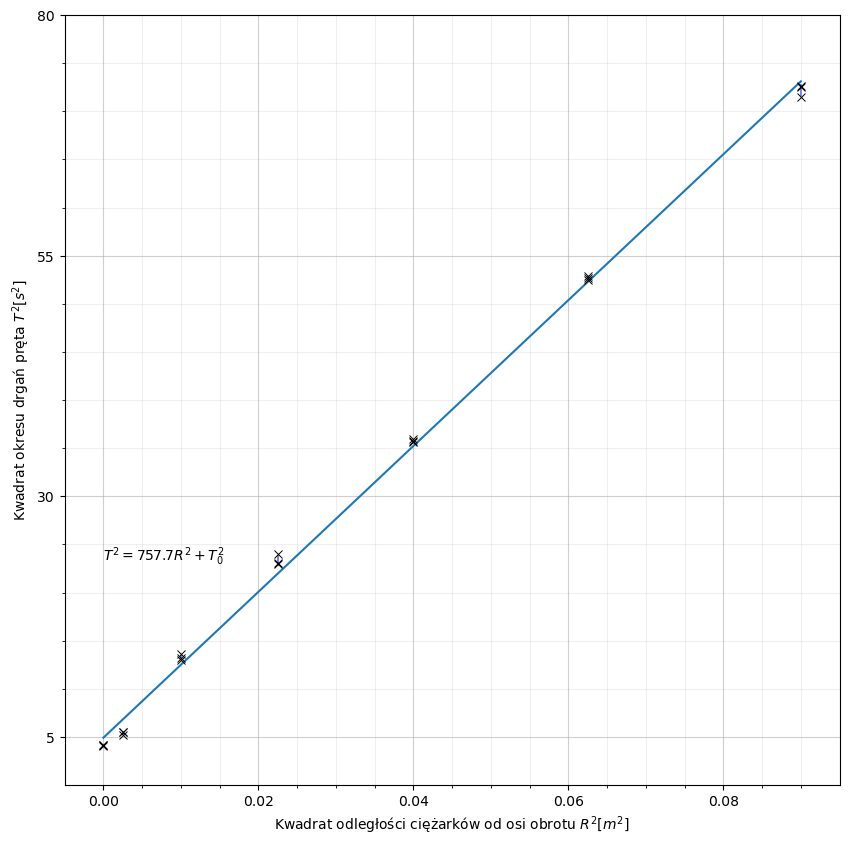

In [13]:
for obiekt in [pret]:
    print(obiekt.x)
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

    # Grid
    # X axis
    major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

    major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
    minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

    # Y axis
    major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

    major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
    minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.6)


    # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)
    
    plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b)  # plot regression line

    plt.plot(obiekt.x,pret.dane[f"T1 [s]"]**2,"kx",markeredgewidth=0.7)
    plt.plot(obiekt.x,pret.dane[f"T2 [s]"]**2,"kx",markeredgewidth=0.7)
    plt.plot(obiekt.x,pret.dane[f"T3 [s]"]**2,"kx",markeredgewidth=0.7)
   
    # plt.plot(x,y,'rx', markeredgewidth=0.4) # plot mean

    plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

    # Adding labels
    ax.set_ylabel(f"Kwadrat okresu drgań {obiekt.conjugated_name} $T^2 [s^2]$")
    ax.set_xlabel(f"{obiekt.x_axis_description}")

    # equation
    plt.text(0,np.median(obiekt.y), f"$T^2 = {obiekt.a:.1f}R^2+T_0^2$")

    plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()


<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1008260/2922038872.py:46: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel(f"Moment bezwładności {obiekt.conjugated_name} $I$ $[kg \cdot m^2]$")


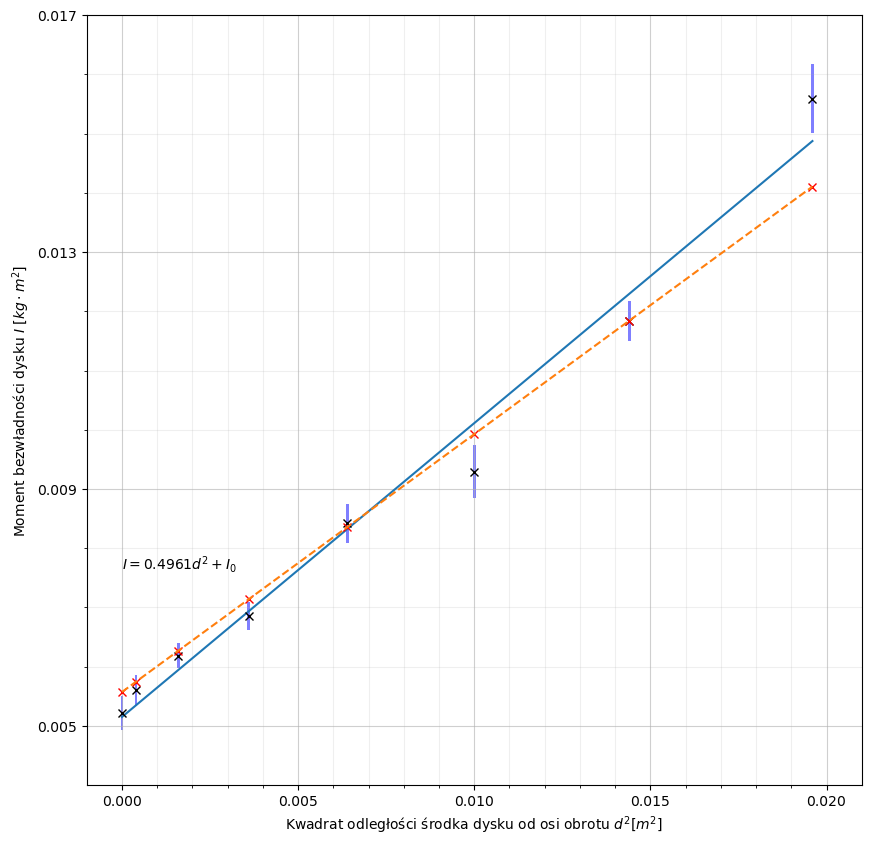

In [27]:
for obiekt in [dysk]:

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

    # Grid
    # X axis
    major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

    major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
    minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

    # Y axis
    major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

    major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
    minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.6)


    # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)

    plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b)  # plot measurement regression line

    plt.plot(obiekt.x,obiekt.y,'kx') # plot measurement points

    plt.plot(obiekt.x,dysk.dane["I teoria [kg*m^2]"],'rx') # plot theoretical points

    plt.plot(teoria.x,teoria.a*teoria.x+teoria.b, linestyle='dashed')  # plot theoretical regression line

    plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

    # Adding labels
    ax.set_ylabel(f"Moment bezwładności {obiekt.conjugated_name} $I$ $[kg \cdot m^2]$")
    ax.set_xlabel(f"{obiekt.x_axis_description}")

    # equation
    plt.text(0,np.median(obiekt.y), f"$I = {obiekt.a:.4f}d^2+I_0$")

    plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()
